# Final Project - Group 3

# Firebase for Homicide and Violent Crime

In [ ]:
!pip install dash

In [3]:
!pip install schedule


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for schedule from https://files.pythonhosted.org/packages/20/a7/84c96b61fd13205f2cafbe263cdb2745965974bdf3e0078f121dfeca5f02/schedule-1.2.2-py3-none-any.whl.metadata


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


## Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output, State
import flask
import urllib.parse
import warnings
warnings.filterwarnings("ignore")

## Web scraping using pandas with a specific table for homicide data

In [2]:
import pandas as pd
import requests
import schedule
import time
from IPython.display import display, clear_output

global homicide_dataframe

def fetch_and_update_data():
    global homicide_dataframe
    # URL to the Wikipedia page containing homicide data
    wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#By_country,_region,_or_dependent_territory'
    country_homicide_tables = pd.read_html(wiki_url)
    country_homicide_df = country_homicide_tables[1]

    # Firebase Realtime Database URL for storing homicide data
    firebase_db_url = 'https://dataprogrammingproject-3a5b1-default-rtdb.firebaseio.com/'

    # Clear existing homicide data in Firebase
    requests.delete(f'{firebase_db_url}/HOMICIDE_DATA.json')

    # Upload each row of homicide data to Firebase
    for index, country_row in country_homicide_df.iterrows():
        payload = country_row.to_dict()
        requests.post(f'{firebase_db_url}/HOMICIDE_DATA.json', json=payload)

    # Retrieve the homicide data from Firebase
    firebase_response = requests.get(f'{firebase_db_url}/HOMICIDE_DATA.json')
    firebase_data = firebase_response.json()

    # Convert the Firebase data to a DataFrame and clean it up
    homicide_dataframe = pd.DataFrame(firebase_data).T
    homicide_dataframe.columns = homicide_dataframe.columns.str.upper()
    homicide_dataframe['YEAR'] = pd.to_numeric(homicide_dataframe['YEAR'], errors='coerce')

    print('Data fetched and updated successfully.')

def run_scheduler():
    schedule.every(24).hours.do(fetch_and_update_data)

    while True:
        schedule.run_pending()
        time.sleep(1)
        clear_output(wait=True)
        display("Scheduler is running...")




In [3]:
fetch_and_update_data()

Data fetched and updated successfully.


In [ ]:
# Run the scheduler only when we want to keep it updating forever
run_scheduler()

 **It gathers homicide rate data from a Wikipedia page, stores it in a Pandas DataFrame, uploads the data to a Firebase Realtime Database, and then retrieves the data back into another DataFrame.**

In [4]:
homicide_dataframe

,COUNT,LOCATION,RATE,REGION,SUBREGION,YEAR
-O4S1_SIXv216a7PU5mA,1613,Afghanistan *,4.022,Asia,Southern Asia,2021
-O4S1_Yo27HJNs1aJS0u,47,Albania *,1.654,Europe,Southern Europe,2022
-O4S1_eWmDDNG4EJHurf,795,Algeria,1.77,Africa,Northern Africa,2022
-O4S1_l3bNAT201w-Yqg,0,American Samoa,0.0,Oceania,Polynesia,2019
-O4S1_riaCyCWKP93FY6,2,Andorra,2.574,Europe,Southern Europe,2020
...,...,...,...,...,...,...
-O4S1vX4GbLY8NFkGEog,3568,Venezuela *,12.607,Americas,Latin America and the Caribbean,2022
-O4S1veG-Y4oQgtY148I,1358,Vietnam *,1.537,Asia,South-eastern Asia,2011
-O4S1vmd0Krj-vLMi7Xy,1703,Yemen *,6.311,Asia,Western Asia,2013
-O4S1vu9_WbB8fSEAxMJ,853,Zambia *,5.25,Africa,Sub-Saharan Africa,2015


In [5]:
homicide_dataframe['YEAR'].unique()


array([2021, 2022, 2019, 2020, 2016, 2014, 2018, 2023, 2006, 2013, 2011,
       2012, 2007, 2015, 2017, 2009, 2010, 2008, 1994], dtype=int64)

## Web scraping using pandas for violent crime data for USA

In [6]:
import pandas as pd

# URL to the Wikipedia page containing violent crime data
us_crime_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate#Rate_by_year'
us_crime_tables = pd.read_html(us_crime_url)
us_crime_dataframe = us_crime_tables[1]

# Display the violent crime data
display(us_crime_dataframe)


,Location,2018,2019,2020,2021,2022
0,United States,383.4,380.8,398.5,387.0,380.7
1,District of Columbia,997.1,1045.2,999.8,951.3,812.3
2,New Mexico,842.8,824.0,778.3,820.8,780.5
3,Alaska,891.7,865.0,837.8,759.1,758.9
4,Arkansas,561.6,580.8,671.9,702.4,645.3
5,Louisiana,543.3,559.7,639.4,662.7,628.6
6,Tennessee,630.4,598.9,672.7,671.8,621.6
7,California,447.5,442.1,442.0,481.2,499.5
8,Colorado,401.5,384.6,423.1,480.4,492.5
9,South Carolina,500.8,510.1,530.7,513.8,491.3


In [7]:
import pandas as pd
import requests

# Convert numeric columns by removing commas and converting to float
def clean_numeric_column(value):
    try:
        return float(value.replace(',', '')) if isinstance(value, str) else value
    except ValueError:
        return None

# Clean specified columns in the crime data
for column in ['2022', '2021', '2020', '2019', '2018']:
    us_crime_dataframe[column] = us_crime_dataframe[column].apply(clean_numeric_column)

# Firebase URL
firebase_url = 'https://dataprogrammingproject-3a5b1-default-rtdb.firebaseio.com'

# Clear existing data in Firebase
requests.delete(f'{firebase_url}/VIOLENT_CRIME_DATA.json')

# Upload cleaned data to Firebase
for _, crime_row in us_crime_dataframe.iterrows():
    # Convert row to a dictionary and ensure there are no NaN values
    row_dict = crime_row.dropna().to_dict()
    # Ensure the dictionary has a valid index for Firebase
    requests.post(f'{firebase_url}/VIOLENT_CRIME_DATA.json', json=row_dict)

# Retrieve and clean data from Firebase
response = requests.get(f'{firebase_url}/VIOLENT_CRIME_DATA.json')
data = response.json()

# Convert the JSON data to a DataFrame
# Ensure that data is in a format where each item is a row
crime_data = pd.DataFrame(data).T

# Rename columns to uppercase if needed
crime_data.columns = crime_data.columns.str.upper()

# Clean and convert columns to numeric
crime_data['2022'] = pd.to_numeric(crime_data['2022'], errors='coerce')
crime_data['LOCATION'] = crime_data['LOCATION'].str.replace('\u202f*', '').str.strip()

# Clean other year columns
for year in ['2021', '2020', '2019', '2018']:
    crime_data[year] = pd.to_numeric(crime_data[year], errors='coerce')

# Check the DataFrame to ensure it looks correct
print(crime_data.head())


                       2018    2019   2020   2021   2022              LOCATION
-O4S23jaIJKyWcGEElAZ  383.4   380.8  398.5  387.0  380.7         United States
-O4S23q_o2fVdwZpk3Tk  997.1  1045.2  999.8  951.3  812.3  District of Columbia
-O4S23xScNVH9ijZkWFB  842.8   824.0  778.3  820.8  780.5            New Mexico
-O4S2439j4kMXulTixjL  891.7   865.0  837.8  759.1  758.9                Alaska
-O4S24A0peFME-tos0W5  561.6   580.8  671.9  702.4  645.3              Arkansas


**Extracts violent crime rate data for U.S. states from a Wikipedia page, cleans the data by removing commas, handling missing values, and converting columns to numeric types. The cleaned data is then uploaded to a Firebase Realtime Database. Finally, the data is retrieved and processed into a Pandas DataFrame for further analysis, with adjustments made to ensure uniformity in the 'LOCATION' column.**

In [8]:
crime_data

,2018,2019,2020,2021,2022,LOCATION
-O4S23jaIJKyWcGEElAZ,383.4,380.8,398.5,387.0,380.7,United States
-O4S23q_o2fVdwZpk3Tk,997.1,1045.2,999.8,951.3,812.3,District of Columbia
-O4S23xScNVH9ijZkWFB,842.8,824.0,778.3,820.8,780.5,New Mexico
-O4S2439j4kMXulTixjL,891.7,865.0,837.8,759.1,758.9,Alaska
-O4S24A0peFME-tos0W5,561.6,580.8,671.9,702.4,645.3,Arkansas
-O4S24GsaqL-41Od9np6,543.3,559.7,639.4,662.7,628.6,Louisiana
-O4S24NcAxq6jzZY4aOX,630.4,598.9,672.7,671.8,621.6,Tennessee
-O4S24U4tAePKaW0ngx_,447.5,442.1,442.0,481.2,499.5,California
-O4S24_ljsc_Aa0Xryfj,401.5,384.6,423.1,480.4,492.5,Colorado
-O4S24gZG8KRW9Ci4IXz,500.8,510.1,530.7,513.8,491.3,South Carolina


## Login Page 

In [9]:
import dash
import dash_html_components as html
import dash_core_components as dcc

external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets, suppress_callback_exceptions=True)

# username and password
VALID_USERNAME_PASSWORD_PAIRS = {
    'admin': '1234'
}

# Login layout
login_layout = html.Div(
    className='container',
    style={'height': '100vh', 'display': 'flex', 'justify-content': 'center', 'align-items': 'center'},
    children=[
        html.Div(
            className='card shadow',
            style={'max-width': '400px', 'width': '100%', 'border-radius': '10px', 'background-color': '#28334AFF'},
            children=[
                html.Div(
                    className='card-header',
                    style={'background-color': '#CD533BFF', 'text-align': 'center', 'padding': '20px'},
                    children=[
                        html.H3('Data Programming Final Project', className='card-title text-light'),
                        html.H5('Welcome to crime Dashboard', className='card-subtitle text-light')
                    ]
                ),
                html.Div(
                    className='card-body',
                    style={'padding': '30px', 'color': '#EAE0D5FF'},
                    children=[
                        dcc.Input(
                            id='username-input',
                            type='text',
                            placeholder='Enter your username',
                            className='form-control mb-3',
                            style={'border-radius': '5px', 'font-size': '16px'}
                        ),
                        dcc.Input(
                            id='password-input',
                            type='password',
                            placeholder='Enter your password',
                            className='form-control mb-3',
                            style={'border-radius': '5px', 'font-size': '16px'}
                        ),
                        html.Button(
                            'Sign In',
                            id='login-button',
                            n_clicks=0,
                            className='btn btn-block mb-3',
                            style={'border-radius': '5px', 'font-size': '18px', 'background-color': '#4F6D7A', 'color': 'white'}
                        ),
                        html.Div(id='login-feedback', className='text-center', style={'color': '#CD533BFF'})
                    ]
                ),
                html.Div(
                    className='card-footer text-center',
                    style={'background-color': '#28334AFF', 'color': '#EAE0D5FF', 'padding': '10px'},
                    children=[
                        html.P('© 2024 BDAT 1004 ', style={'margin': '0'})
                    ]
                )
            ]
        )
    ]
)

app.layout = login_layout


**Sets up a Dash web application with a Bootstrap-styled login layout. The design features input fields for username and password, a login button, and user feedback. Using a Bootstrap card component, the layout ensures a responsive and appealing interface. The app is configured to handle callback exceptions for a smoother user experience, with predefined authentication credentials stored in the VALID_USERNAME_PASSWORD_PAIRS dictionary.**

## Dashboard Layout

In [10]:
import dash
from dash import html, dcc, Input, Output
import plotly.express as px
import pandas as pd

app = dash.Dash(__name__)
df_homicide=homicide_dataframe.copy()
df_violent_crime=crime_data.copy()

# Check if 'LOCATION' column is present
if 'LOCATION' in df_homicide.columns:
    regions = df_homicide['LOCATION'].unique().tolist()
else:
    raise ValueError("Column 'LOCATION' not found in df_homicide")

# Define the layout
dashboard_layout = html.Div([
    html.H1(children='Global Crime Data Insights', style={'text-align': 'center', 'color': '#2C3E50'}),
    dcc.Tabs([
        dcc.Tab(label='Comparison Bar Chart', children=[
            dcc.Graph(
                id='bar-chart-homicide',
                figure=px.bar(df_homicide, x='REGION', y='RATE', color='REGION',
                              title='Homicide Rate Comparison by Global Regions',
                              color_discrete_sequence=px.colors.sequential.Viridis)
            )
        ]),
        
        dcc.Tab(label='Region Scatter Plot', children=[
            html.Label('Select a region for detailed analysis:', style={'font-weight': 'bold', 'color': '#2C3E50'}),
            dcc.Dropdown(
                id='region-dropdown',
                options=[{'label': region, 'value': region} for region in regions],
                value=regions[0],  # Default value (make sure it exists in the data)
                style={'background-color': '#F2F3F4'}
            ),
            
            dcc.Graph(
                id='scatter-plot-homicide',
                # Initial figure setup
                figure=px.scatter(df_homicide[df_homicide['LOCATION'] == regions[0]],
                                  x='COUNT', y='RATE', color='REGION',
                                  size='YEAR', title='Homicide Incidents vs Rate in Selected Regions',
                                  color_discrete_sequence=px.colors.qualitative.Pastel)
            ),
        ]),
        
        dcc.Tab(label='Subregion Distribution Pie Chart', children=[
            dcc.Graph(
                id='pie-chart-subregion',
                figure=px.pie(df_homicide, names='SUBREGION', title='Homicide Rates by Subregion',
                              hole=0.4, labels={'SUBREGION': 'Subregion'},
                              color_discrete_sequence=px.colors.qualitative.Set2)
            ),
        ]),
        
        dcc.Tab(label='Global Homicide Map', children=[
            dcc.Graph(
                id='map-homicide',
                figure=px.choropleth(df_homicide, locations='LOCATION', locationmode='country names',
                                     color='RATE', hover_name='LOCATION', title='Global Homicide Rate Map',
                                     color_continuous_scale=px.colors.sequential.Inferno, projection='orthographic')
            ),
        ]),
        
        dcc.Tab(label='Homicide Rate Distribution Histogram', children=[
            dcc.Graph(
                id='histogram-homicide',
                figure=px.histogram(df_homicide, x='RATE', nbins=20,
                                     title='Homicide Rate Distribution Across Regions', marginal='violin')
            ),
        ]),

        dcc.Tab(label='Animated Global Trends', children=[
            dcc.Graph(
                id='animated-bar-chart-homicide',
                figure=px.bar(df_homicide, x='REGION', y='RATE', color='REGION', animation_frame='YEAR',
                              title='Yearly Homicide Rate Trends by Region',
                              height=600, color_discrete_sequence=px.colors.sequential.Turbo)
            ),
        ]),

        dcc.Tab(label='USA Crime Rate Trends', children=[
            dcc.Graph(
                id='line-chart-violent-crime',
                figure=px.line(df_violent_crime, x='LOCATION', y=['2018', '2019', '2020', '2021', '2022'],
                               title='Violent Crime Rates in the USA by Location',
                               line_shape='spline', render_mode='svg')
            ),
        ]),
    ]),
], style={'background-color': '#F4F4F4', 'padding': '20px'})

# Define the callback
@app.callback(
    Output('scatter-plot-homicide', 'figure'),
    Input('region-dropdown', 'value')
)
def update_scatter_plot(selected_region):
    filtered_df = df_homicide[df_homicide['REGION'] == selected_region]
    fig = px.scatter(filtered_df, x='COUNT', y='RATE', color='REGION',
                     size='YEAR', title=f'Homicide Incidents vs Rate in {selected_region}',
                     color_discrete_sequence=px.colors.qualitative.Pastel)
    return fig
app.layout=dashboard_layout

In [11]:
pwd()

'C:\\Users\\rahul\\Downloads\\Final Project DATA PROG\\Final Project'

**This Dash web application layout defines a dashboard with multiple tabs, each presenting different visualizations of homicide rate data. The tabs include bar charts, scatter plots, pie charts, choropleth maps, histograms, and an animated bar chart. Additionally, there's a separate tab displaying a line chart for violent crime rates in U.S. locations over time, using data from df_violent_crime. The charts are created using Plotly Express functions.**

## About Us Page

In [12]:
import dash_html_components as html

# Define the team members with student IDs
team_members = [
    {'name': 'Rahul Menaria', 'student_id': '200563265'},  # Student ID for Rahul
    {'name': 'Rahul Menaria', 'student_id': '200555789'},  # Student ID for Rahul
    {'name': 'Vaibhav Patel', 'student_id': '200592458'},  # Student ID for Vaibhav
    {'name': 'Manya Manya', 'student_id': '200584753'},  # Student ID for Manya
]

about_us_layout = html.Div(
    className='container mt-5',
    style={'font-family': 'Arial, sans-serif', 'text-align': 'center'},
    children=[
        html.H1('Meet Our Team', className='mb-5', style={'font-size': '3rem', 'color': '#333'}),
        html.Div(
            className='row row-cols-1 row-cols-md-2 row-cols-lg-4 g-4',
            children=[
                html.Div(
                    className='col',
                    children=[
                        html.Div(
                            className='card border-0 shadow-sm',
                            children=[
                                html.Div(
                                    className='card-img-top rounded-circle mx-auto mt-3',
                                    children=[
                                        html.H2(member['student_id'], className='text-center', style={'font-size': '2rem', 'color': '#333'})
                                    ]
                                ),
                                html.Div(
                                    className='card-body',
                                    children=[
                                        html.H5(member['name'], className='card-title'),
                                        html.P('', className='card-text'),
                                    ]
                                )
                            ]
                        )
                    ]
                ) for member in team_members
            ]
        )
    ]
)


**This Dash layout creates a webpage section introducing a team of four members. It displays their names and student IDs in a responsive card layout. Each card includes a large, centered display of the student ID, with names and placeholder descriptions provided. The layout is styled using Bootstrap classes for a clean and organized presentation.**

## Home Page

In [13]:
import dash
from dash import html, dcc

app = dash.Dash(__name__)

home_layout = html.Div(
    className='container mt-5',
    style={'font-family': 'Verdana, sans-serif', 'line-height': '1.8', 'background-color': '#ECF0F1'},
    children=[
        html.Div(
            className='jumbotron shadow-lg rounded',
            style={'padding': '2rem', 'border-radius': '15px', 'background-color': '#3498DB', 'color': 'white'},
            children=[
                html.H1('Overview of Global Homicide Rates', className='display-4', style={'font-size': '2.5rem'}),
                html.P(
                    'Understanding homicide rates helps gauge the frequency of intentional killings across various regions. This metric reveals key insights into safety conditions and the efficacy of law enforcement.',
                    style={'font-size': '1.2rem', 'margin-bottom': '1rem'}
                ),
                html.P(
                    'These rates vary widely by country due to diverse factors such as culture, economic conditions, and legal systems. Identifying these disparities is crucial for effective crime prevention.',
                    style={'font-size': '1.2rem', 'margin-bottom': '1rem'}
                ),
                html.P(
                    [
                        'For an in-depth look at global homicide rates, visit the ',
                        html.A('Homicide Rate Wikipedia Page', href='https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#', target='_blank', style={'color': '#FFD700', 'font-weight': 'bold'}),
                        '.'
                    ],
                    style={'font-size': '1.2rem'}
                ),
            ]
        ),
        html.Div(
            className='card mt-4 shadow-sm rounded',
            style={'background-color': '#FDFEFE', 'border-radius': '15px'},
            children=[
                html.Div(
                    className='card-header',
                    style={'background-color': '#1F78B4', 'color': 'white', 'border-radius': '15px 15px 0 0'},
                    children=[
                        html.H2('Homicide Rate Comparison by Country', className='card-title', style={'font-size': '1.8rem'})
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.Table([
                            html.Thead(html.Tr([html.Th('Country', style={'font-weight': 'bold'}), html.Th('Rate per 100,000', style={'font-weight': 'bold'})])),
                            html.Tbody([
                                html.Tr([html.Td('United States'), html.Td('5.8')]),
                                html.Tr([html.Td('Russia'), html.Td('9.2')]),
                                html.Tr([html.Td('Brazil'), html.Td('27.5')]),
                                html.Tr([html.Td('South Africa'), html.Td('35.9')]),
                                html.Tr([html.Td('Mexico'), html.Td('23.5')]),
                                html.Tr([html.Td('Japan'), html.Td('0.3')]),
                            ])
                        ], className='table table-striped')
                    ]
                )
            ]
        ),
        html.Div(
            className='card mt-4 shadow-sm rounded',
            style={'background-color': '#FDFEFE', 'border-radius': '15px'},
            children=[
                html.Div(
                    className='card-header',
                    style={'background-color': '#1F78B4', 'color': 'white', 'border-radius': '15px 15px 0 0'},
                    children=[
                        html.H2('Violent Crime Insights', className='card-title', style={'font-size': '1.8rem'})
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.P(
                            'Violent crime rates include various acts of violence such as assaults and robberies. Examining these rates provides a clearer picture of safety trends in different regions.',
                            style={'font-size': '1.2rem'}
                        ),
                        html.P(
                            'Variations in violent crime rates are influenced by social, economic, and legislative factors. Understanding these influences helps in formulating targeted strategies to combat violence.',
                            style={'font-size': '1.2rem'}
                        ),
                        html.P(
                            [
                                'For detailed violent crime statistics worldwide, visit the ',
                                html.A('Violent Crime Statistics Page', href='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate', target='_blank', style={'color': '#FFD700', 'font-weight': 'bold'}),
                                '.'
                            ],
                            style={'font-size': '1.2rem'}
                        ),
                    ]
                )
            ]
        ),
        html.Div(
            className='card mt-4 shadow-sm rounded',
            style={'background-color': '#FDFEFE', 'border-radius': '15px'},
            children=[
                html.Div(
                    className='card-header',
                    style={'background-color': '#1F78B4', 'color': 'white', 'border-radius': '15px 15px 0 0'},
                    children=[
                        html.H2('Global Violent Crime Rates by Country', className='card-title', style={'font-size': '1.8rem'})
                    ]
                ),
                html.Div(
                    className='card-body',
                    children=[
                        html.Table([
                            html.Thead(html.Tr([html.Th('Country', style={'font-weight': 'bold'}), html.Th('Rate per 100,000', style={'font-weight': 'bold'})])),
                            html.Tbody([
                                html.Tr([html.Td('United States'), html.Td('380.6')]),
                                html.Tr([html.Td('Canada'), html.Td('891.0')]),
                                html.Tr([html.Td('Australia'), html.Td('775.2')]),
                                html.Tr([html.Td('England & Wales'), html.Td('793.7')]),
                                html.Tr([html.Td('Germany'), html.Td('686.6')]),
                                html.Tr([html.Td('Japan'), html.Td('76.1')]),
                            ])
                        ], className='table table-bordered')
                    ]
                )
            ]
        ),
        html.P(
            [
                'For additional information on crime rates, check these resources: ',
                html.A('Global Homicide Rates', href='https://en.wikipedia.org/wiki/List_of_countries_by_intentional_homicide_rate#', target='_blank', style={'color': '#1F78B4', 'font-weight': 'bold'}),
                ' and ',
                html.A('Violent Crime Rates', href='https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate', target='_blank', style={'color': '#1F78B4', 'font-weight': 'bold'}),
                '.'
            ],
            style={'font-size': '1.2rem', 'margin-top': '20px'}
        )
    ]
)

# Assign the layout to the app
app.layout = home_layout


**This Dash layout features a webpage showcasing data on intentional homicide rates and violent crime rates by country. It includes a header, descriptive text, and tables for comparing the rates. The design is both visually appealing and responsive, utilizing Bootstrap styling, and includes external links to relevant Wikipedia pages for additional information.**

## Navigation Bar

In [14]:
import dash
from dash import html

# Create the Dash app
app = dash.Dash(__name__)

navbar = html.Nav(
    className='navbar navbar-expand-lg navbar-light bg-primary shadow-sm',
    children=[
        html.Div(
            className='container-fluid',
            children=[
                html.A(
                    'Global Crime Dashboard',
                    href='/home',
                    className='navbar-brand',
                    style={'font-size': '1.8rem', 'font-weight': 'bold', 'color': '#000000'}
                ),
                html.Button(
                    html.Span(className='navbar-toggler-icon'),
                    className='navbar-toggler',
                    **{'type': 'button', 'aria-controls': 'navbarSupportedContent', 'aria-expanded': 'false',
                       'aria-label': 'Toggle navigation'}
                ),
                html.Div(
                    className='collapse navbar-collapse',
                    id='navbarSupportedContent',
                    children=[
                        html.Ul(
                            [
                                html.Li(html.A('Home', href='/home', className='nav-link', style={'color': '#000000', 'font-weight': '500'})),
                                html.Li(html.A('Dashboard', href='/dashboard', className='nav-link', style={'color': '#000000', 'font-weight': '500'})),
                                html.Li(html.A('About Us', href='/about-us', className='nav-link', style={'color': '#000000', 'font-weight': '500'})),
                                # Add more navbar items as needed
                            ],
                            className='navbar-nav me-auto mb-2 mb-lg-0'
                        ),
                    ]
                )
            ]
        )
    ]
)

# Assign the layout to the app
app.layout = html.Div([
    navbar,
    # Other layout components
])



**This code sets up a Bootstrap-styled navigation bar for a Dash web application. It features a brand link, a responsive toggle button for mobile views, and navigation links ('Home', 'Dashboard', 'About Us') within a collapsible menu. The navbar can be further customized with additional items or elements to enhance functionality or features.**

## Dash App Callbacks and Layout Configuration for User Authentication and Page Navigation

In [15]:

@app.callback(
    Output('login-feedback', 'children'),
    [Input('login-button', 'n_clicks')],
    [State('username-input', 'value'),
     State('password-input', 'value')]
)
def authenticate_user(n_clicks, username, password):
    if n_clicks > 0:
        if username in VALID_USERNAME_PASSWORD_PAIRS and password == VALID_USERNAME_PASSWORD_PAIRS[username]:
            return dcc.Location(pathname='/home', id='url-home')
        else:
            return html.Div('Invalid username or password. Please try again.')

# Callback to switch between login, dashboard, and about us layouts based on URL
@app.callback(Output('page-content', 'children'),
              [Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/dashboard':
        return [navbar, dashboard_layout]
    elif pathname == '/about-us':
        return [navbar, about_us_layout]
    elif pathname == '/home':
        return [navbar, home_layout]
    else:
        return login_layout

# Main app layout containing login, dashboard, and about us layouts
app.layout = html.Div([
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content')
])

**This Dash app code includes two callbacks. The first callback manages user authentication by verifying the entered username and password against predefined credentials. Upon successful login, it redirects users to the '/home' page; if authentication fails, it shows an error message. The second callback updates the layout based on the URL pathname, allowing the display of different pages ('login', 'dashboard', 'about us'). The main app layout features a dcc.Location component for handling URL changes and a placeholder div ('page-content') for rendering the different layouts.**

## Run the application

In [16]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)

### Port number

## http://127.0.0.1:8050/login

**When we click on this port number, it will redirect us to new tab and our application will run after logging in!!**

In [25]:
import requests
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

## Fetching and Processing Data from Firebase for Homicide and Violent Crime, and Saving to CSV Files

In [26]:
# Firebase Realtime Database URLs
HOMICIDE_URL = 'https://dataprogrammingproject-3a5b1-default-rtdb.firebaseio.com/HOMICIDE_DATA.json'
VIOLENT_CRIME_URL = 'https://dataprogrammingproject-3a5b1-default-rtdb.firebaseio.com/VIOLENT_CRIME_DATA.json'

# Fetch data from Firebase
homicide_response = requests.get(HOMICIDE_URL)
violent_crime_response = requests.get(VIOLENT_CRIME_URL)

# Convert JSON response to Python dictionary
homicide_data = homicide_response.json()
violent_crime_data = violent_crime_response.json()

# Creating DataFrame for HOMICIDE_DATA
homicide_df = pd.DataFrame(homicide_data.values())

# Creating DataFrame for VIOLENT_CRIME_DATA
violent_crime_list = []
for year, value in violent_crime_data.items():
    if year != '2023':
        violent_crime_list.append({'Year': year, 'Value': value})
violent_crime_list.append({'Year': '2023', 'Value': violent_crime_data.get('2023', '')})

violent_crime_df = pd.DataFrame(violent_crime_list)

# Saving DataFrames to CSV files
homicide_df.to_csv('homicide_data.csv', index=False)
violent_crime_df.to_csv('violent_crime_data.csv', index=False)

In [27]:
import pandas as pd
import ast

# Load data from CSV file
crime_data_df = pd.read_csv('violent_crime_data.csv')

# Replace NaN values in 'Value' column with an empty dictionary to prevent errors
crime_data_df['Value'].fillna('{}', inplace=True)

# Convert string representations of dictionaries to actual dictionary objects
crime_data_df['Value'] = crime_data_df['Value'].apply(ast.literal_eval)

# Expand dictionary values into separate columns
expanded_df = pd.concat([crime_data_df.drop('Value', axis=1), crime_data_df['Value'].apply(pd.Series)], axis=1)

# Drop the 'Year' column if it's no longer needed
result_df = expanded_df.drop(columns=['Year'])


## Data Cleaning

In [28]:
homicide_df

,Count,Location,Rate,Region,Subregion,Year
0,1613,Afghanistan *,4.022,Asia,Southern Asia,2021
1,47,Albania *,1.654,Europe,Southern Europe,2022
2,795,Algeria,1.770,Africa,Northern Africa,2022
3,0,American Samoa,0.000,Oceania,Polynesia,2019
4,2,Andorra,2.574,Europe,Southern Europe,2020
...,...,...,...,...,...,...
199,3568,Venezuela *,12.607,Americas,Latin America and the Caribbean,2022
200,1358,Vietnam *,1.537,Asia,South-eastern Asia,2011
201,1703,Yemen *,6.311,Asia,Western Asia,2013
202,853,Zambia *,5.250,Africa,Sub-Saharan Africa,2015


In [29]:
violent_crime_df

,Year,Value
0,-O4K4ES3_goJFv8qOKv3,"{'2018': 383.4, '2019': 380.8, '2020': 398.5, ..."
1,-O4K4EYXNtleOaH8Lbvr,"{'2018': 997.1, '2019': 1045.2, '2020': 999.8,..."
2,-O4K4EpJVIFcBFx4sKeU,"{'2018': 842.8, '2019': 824.0, '2020': 778.3, ..."
3,-O4K4EvlglELWzIZz9VU,"{'2018': 891.7, '2019': 865.0, '2020': 837.8, ..."
4,-O4K4F1FYXoWkCdWtST7,"{'2018': 561.6, '2019': 580.8, '2020': 671.9, ..."
5,-O4K4F7g192c7XnASEYU,"{'2018': 543.3, '2019': 559.7, '2020': 639.4, ..."
6,-O4K4FE3gOI-yuJY3CZV,"{'2018': 630.4, '2019': 598.9, '2020': 672.7, ..."
7,-O4K4FKNqkaCa8NrYxvh,"{'2018': 447.5, '2019': 442.1, '2020': 442.0, ..."
8,-O4K4FQrjViSuiIN9AWh,"{'2018': 401.5, '2019': 384.6, '2020': 423.1, ..."
9,-O4K4FXICsJXPTMBUrYu,"{'2018': 500.8, '2019': 510.1, '2020': 530.7, ..."


In [30]:
# Check the structure and summary statistics of the datasets
print(homicide_df.info())
print(homicide_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Count      204 non-null    int64  
 1   Location   204 non-null    object 
 2   Rate       204 non-null    float64
 3   Region     204 non-null    object 
 4   Subregion  204 non-null    object 
 5   Year       204 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.7+ KB
None
              Count        Rate         Year
count    204.000000  204.000000   204.000000
mean    1797.539216    7.165618  2019.009804
std     6256.422513   11.175730     4.699848
min        0.000000    0.000000  1994.000000
25%       15.750000    1.016500  2018.000000
50%      112.000000    2.604000  2021.000000
75%      744.500000    7.195500  2022.000000
max    44367.000000   76.582000  2023.000000


In [31]:
print(violent_crime_df.info())
print(violent_crime_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    53 non-null     object
 1   Value   53 non-null     object
dtypes: object(2)
memory usage: 980.0+ bytes
None
                        Year  \
count                     53   
unique                    53   
top     -O4K4ES3_goJFv8qOKv3   
freq                       1   

                                                    Value  
count                                                  53  
unique                                                 53  
top     {'2018': 383.4, '2019': 380.8, '2020': 398.5, ...  
freq                                                    1  


In [32]:
# Check for missing values and handle if any
print(homicide_df.isnull().sum())
print(violent_crime_df.isnull().sum())


Count        0
Location     0
Rate         0
Region       0
Subregion    0
Year         0
dtype: int64
Year     0
Value    0
dtype: int64


In [33]:
# Remove rows with any missing values
violent_crime_df.dropna(inplace=True)

print(homicide_df.isnull().sum())
print(violent_crime_df.isnull().sum())


Count        0
Location     0
Rate         0
Region       0
Subregion    0
Year         0
dtype: int64
Year     0
Value    0
dtype: int64


In [35]:
# Saving the processed DataFrame back to CSV
homicide_df.to_csv('processed_homicide_data.csv', index=False)
violent_crime_df.to_csv('processed_violent_crime_data.csv', index=False)

In [36]:
# Reading data from CSV files
violent_crime_df = pd.read_csv('processed_violent_crime_data.csv')
homicide_df= pd.read_csv('processed_homicide_data.csv')

In [37]:
violent_crime_df

,Year,Value
0,-O4K4ES3_goJFv8qOKv3,"{'2018': 383.4, '2019': 380.8, '2020': 398.5, ..."
1,-O4K4EYXNtleOaH8Lbvr,"{'2018': 997.1, '2019': 1045.2, '2020': 999.8,..."
2,-O4K4EpJVIFcBFx4sKeU,"{'2018': 842.8, '2019': 824.0, '2020': 778.3, ..."
3,-O4K4EvlglELWzIZz9VU,"{'2018': 891.7, '2019': 865.0, '2020': 837.8, ..."
4,-O4K4F1FYXoWkCdWtST7,"{'2018': 561.6, '2019': 580.8, '2020': 671.9, ..."
5,-O4K4F7g192c7XnASEYU,"{'2018': 543.3, '2019': 559.7, '2020': 639.4, ..."
6,-O4K4FE3gOI-yuJY3CZV,"{'2018': 630.4, '2019': 598.9, '2020': 672.7, ..."
7,-O4K4FKNqkaCa8NrYxvh,"{'2018': 447.5, '2019': 442.1, '2020': 442.0, ..."
8,-O4K4FQrjViSuiIN9AWh,"{'2018': 401.5, '2019': 384.6, '2020': 423.1, ..."
9,-O4K4FXICsJXPTMBUrYu,"{'2018': 500.8, '2019': 510.1, '2020': 530.7, ..."


## Bar Plot

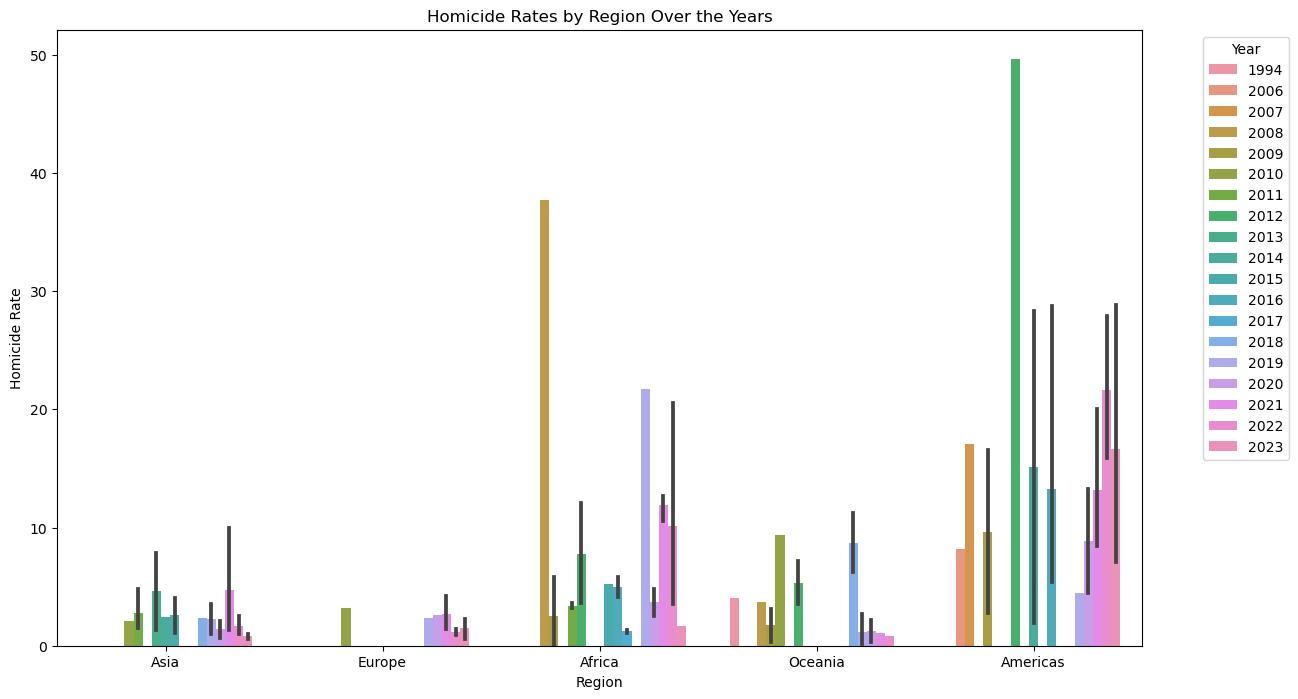

In [38]:
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=homicide_df, x='Region', y='Rate', hue='Year')
plt.title('Homicide Rates by Region Over the Years')
plt.xlabel('Region')
plt.ylabel('Homicide Rate')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**After seeing this Bar Plot, we can compare that that highest homicide rates are in "America". Whereas,  the second highest is in "Africa". In "Asia and "Oceania", homicide rates are comparatively same and in "Europe" rates are very low maongst all.**

## Box Plot

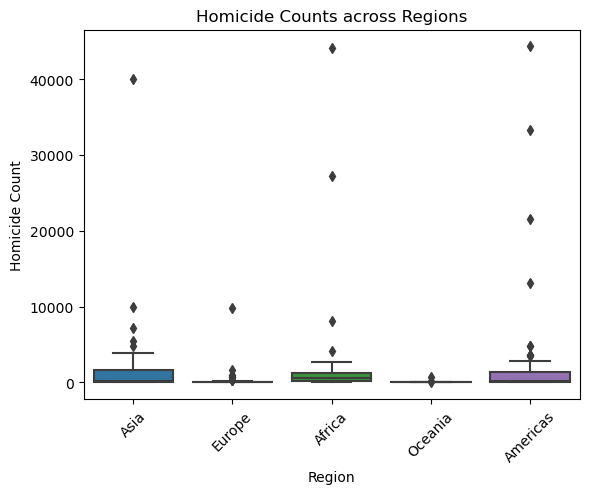

In [39]:

sns.boxplot(x='Region', y='Count', data=homicide_df)
plt.xlabel('Region')
plt.ylabel('Homicide Count')
plt.title('Homicide Counts across Regions')
plt.xticks(rotation=45)
plt.show()

**The code utilizes Seaborn to generate a boxplot that visualizes homicide counts across various regions from the homicide_df DataFrame. The x-axis represents the regions, while the y-axis shows the homicide counts. This plot offers a clear view of the distribution and variability in homicide counts. Enhanced with labels and a title for better clarity, the plot is displayed using plt.show().**

## Bar Plot

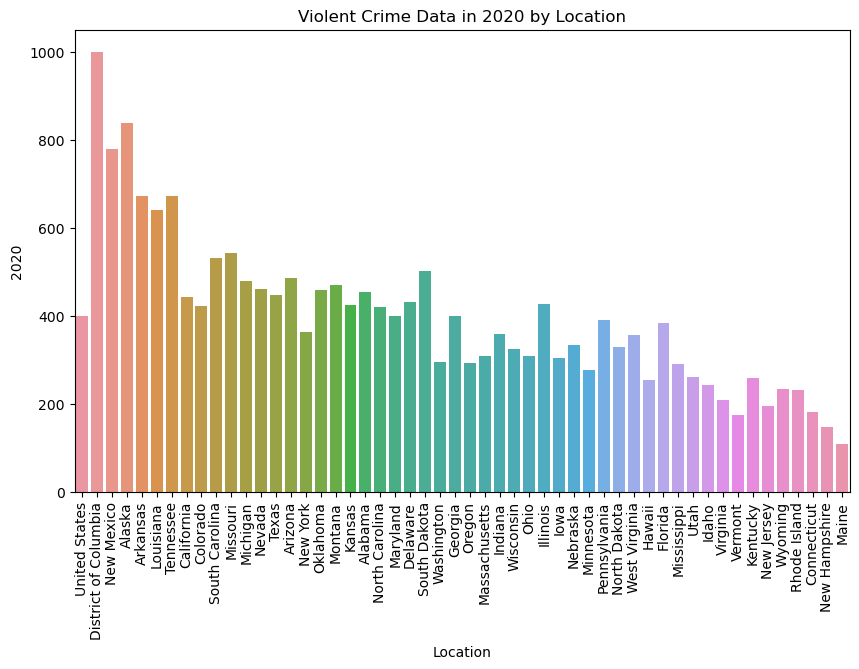

In [40]:
# Copy the DataFrame to a new variable
violent_crime_copy_df = violent_crime_df.copy()
import ast
violent_crime_copy_df['Value'] = violent_crime_copy_df['Value'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Extract 'Location' and '2020' from the 'Value' column
violent_crime_copy_df['Location'] = violent_crime_copy_df['Value'].apply(lambda x: x.get('Location') if isinstance(x, dict) else None)
violent_crime_copy_df['2020'] = violent_crime_copy_df['Value'].apply(lambda x: x.get('2020') if isinstance(x, dict) else None)

# Drop rows where 'Location' or '2020' is None
violent_crime_copy_df.dropna(subset=['Location', '2020'], inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='2020', data=violent_crime_copy_df)
plt.title('Violent Crime Data in 2020 by Location')
plt.xticks(rotation=90)
plt.show()


In [41]:
violent_crime_copy_df

,Year,Value,Location,2020
0,-O4K4ES3_goJFv8qOKv3,"{'2018': 383.4, '2019': 380.8, '2020': 398.5, ...",United States,398.5
1,-O4K4EYXNtleOaH8Lbvr,"{'2018': 997.1, '2019': 1045.2, '2020': 999.8,...",District of Columbia,999.8
2,-O4K4EpJVIFcBFx4sKeU,"{'2018': 842.8, '2019': 824.0, '2020': 778.3, ...",New Mexico,778.3
3,-O4K4EvlglELWzIZz9VU,"{'2018': 891.7, '2019': 865.0, '2020': 837.8, ...",Alaska,837.8
4,-O4K4F1FYXoWkCdWtST7,"{'2018': 561.6, '2019': 580.8, '2020': 671.9, ...",Arkansas,671.9
5,-O4K4F7g192c7XnASEYU,"{'2018': 543.3, '2019': 559.7, '2020': 639.4, ...",Louisiana,639.4
6,-O4K4FE3gOI-yuJY3CZV,"{'2018': 630.4, '2019': 598.9, '2020': 672.7, ...",Tennessee,672.7
7,-O4K4FKNqkaCa8NrYxvh,"{'2018': 447.5, '2019': 442.1, '2020': 442.0, ...",California,442.0
8,-O4K4FQrjViSuiIN9AWh,"{'2018': 401.5, '2019': 384.6, '2020': 423.1, ...",Colorado,423.1
9,-O4K4FXICsJXPTMBUrYu,"{'2018': 500.8, '2019': 510.1, '2020': 530.7, ...",South Carolina,530.7


**Above Bar Plot comapres the city wise "Violent crime data in 2020" for all over USA. We can see that "Washington D.C" is having highest violence rate and "Maine" is having the lowest violence rate.**

## Line Graph

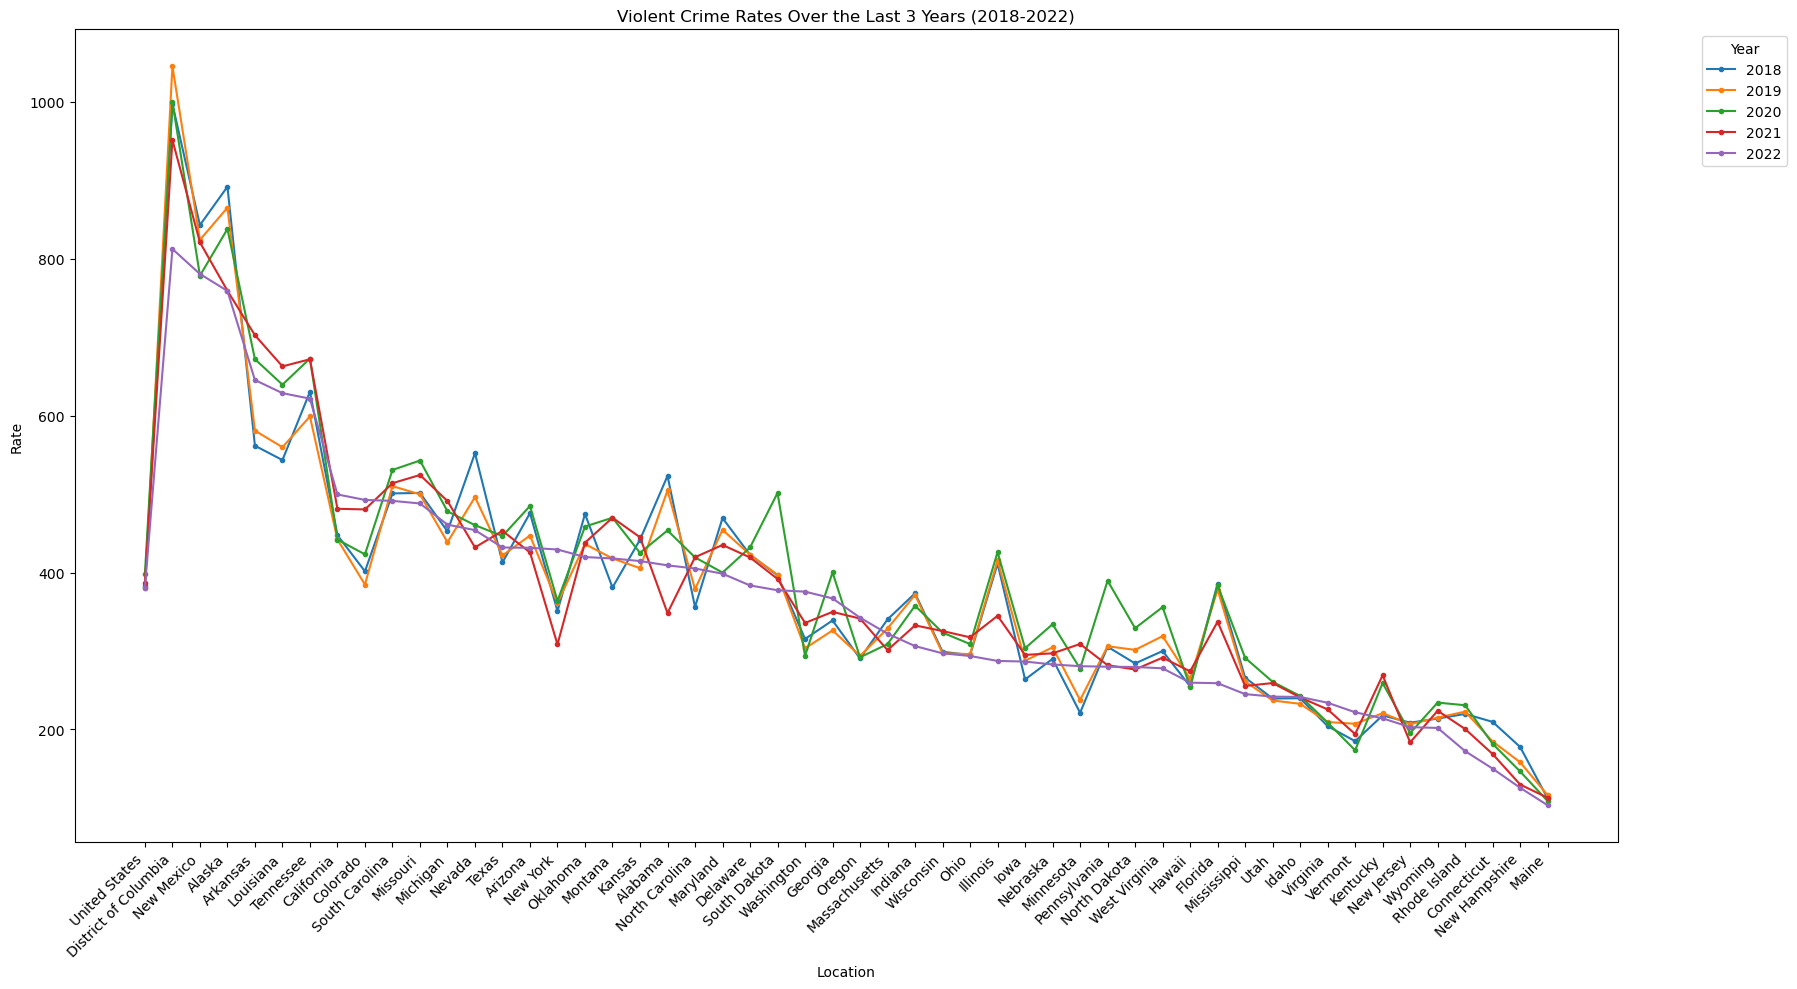

In [42]:
# Select the last 3 years
years_last_3 = [str(year) for year in range(2018, 2023)]

# Set up the figure and axes
plt.figure(figsize=(18, 10))

# Plotting line chart for the last 5 years
for year in years_last_3:
    violent_crime_copy_df[year] = violent_crime_copy_df['Value'].apply(lambda x: x.get(year) if isinstance(x, dict) else None)
    plt.plot(violent_crime_copy_df['Location'], violent_crime_copy_df[year], label=year, marker='.')

# Adding labels and title
plt.title('Violent Crime Rates Over the Last 3 Years (2018-2022)')
plt.xlabel('Location')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**Create a line chart with Matplotlib to display the trend in violent crime rates across various locations for the last five years (2018-2022). Each line on the chart corresponds to a different year, with markers highlighting individual data points. The x-axis represents the different locations, while the y-axis shows the crime rates. The chart includes labeled axes, a descriptive title, and a legend to improve clarity. The x-axis labels are rotated for better readability, and a tight layout is applied to ensure everything fits well.**

## Correlation Heatmap Matrix

**A heatmap displaying the correlation matrix for numeric columns in the homicide_df DataFrame. Non-numeric entries are substituted with NaN. The heatmap visually represents the pairwise correlations between variables, with annotations showing the correlation coefficients. The title 'Correlation Matrix for Homicide Data' provides context for the visualization.**

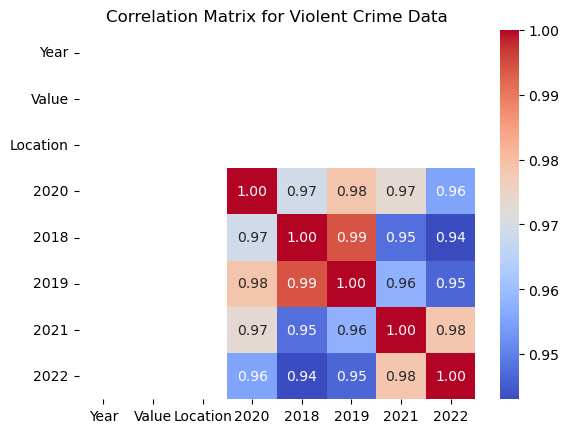

In [43]:
# Convert numeric columns to numeric, replace non-numeric values with NaN
violent_crime_df_numeric = violent_crime_copy_df.apply(pd.to_numeric, errors='coerce')

# Create correlation matrix
corr_matrix_violent_crime = violent_crime_df_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix_violent_crime, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Violent Crime Data')
plt.show()


## Clusters

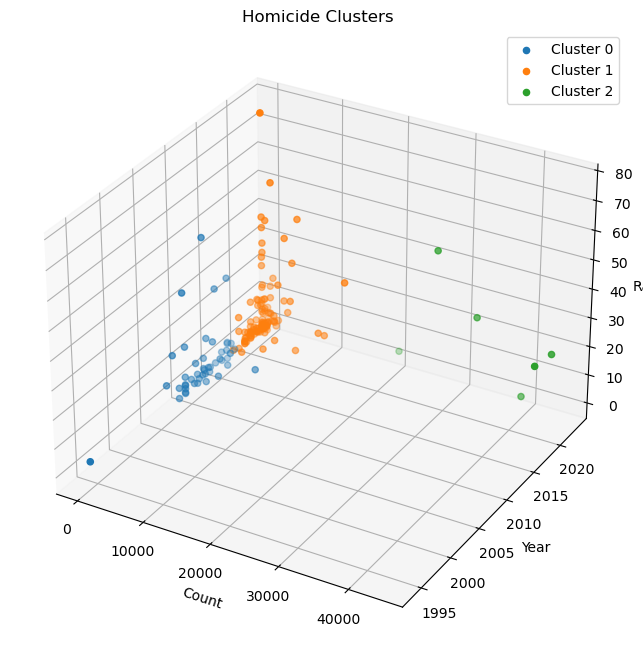

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the columns to use for clustering
clustering_data = homicide_df[['Count', 'Year']]

# Standardize the selected features
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Specify the number of clusters for K-means
number_of_clusters = 3

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=number_of_clusters, random_state=42)
homicide_df['Cluster'] = kmeans_model.fit_predict(scaled_clustering_data)

# Generate a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot each cluster with different colors
for cluster_num in range(number_of_clusters):
    clustered_data = homicide_df[homicide_df['Cluster'] == cluster_num]
    ax.scatter(clustered_data['Count'], clustered_data['Year'], clustered_data['Rate'], label=f'Cluster {cluster_num}')

# Set the axis labels and the plot title
ax.set_xlabel('Count')
ax.set_ylabel('Year')
ax.set_zlabel('Rate')
ax.set_title('Homicide Clusters')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()


**Performs K-means clustering on homicide data using scikit-learn. It selects relevant columns ('Count' and 'Year'), standardizes the data, and applies K-means with three clusters. The clusters are visualized in a 3D scatter plot, where each point represents a data point in the space defined by homicide count, year, and rate. Each cluster is distinguished by color, and the plot includes labels and a legend for better interpretation.**

## Predictive Model

In [45]:
from sklearn.linear_model import LinearRegression

# Features for prediction
features = ['Year', 'Count']

# Extracting features and target variable
X = homicide_df[features].values.reshape(-1, len(features))
y = homicide_df['Rate'].values

# Creating and fitting the model
model_homicide = LinearRegression()
model_homicide.fit(X, y)

# Predicting for the next year (2023)
prediction_homicide = model_homicide.predict([[2023, homicide_df['Count'].mean()]])
print(f"Predicted Homicide Rate for 2023: {prediction_homicide[0]}")


Predicted Homicide Rate for 2023: 7.226753333439834


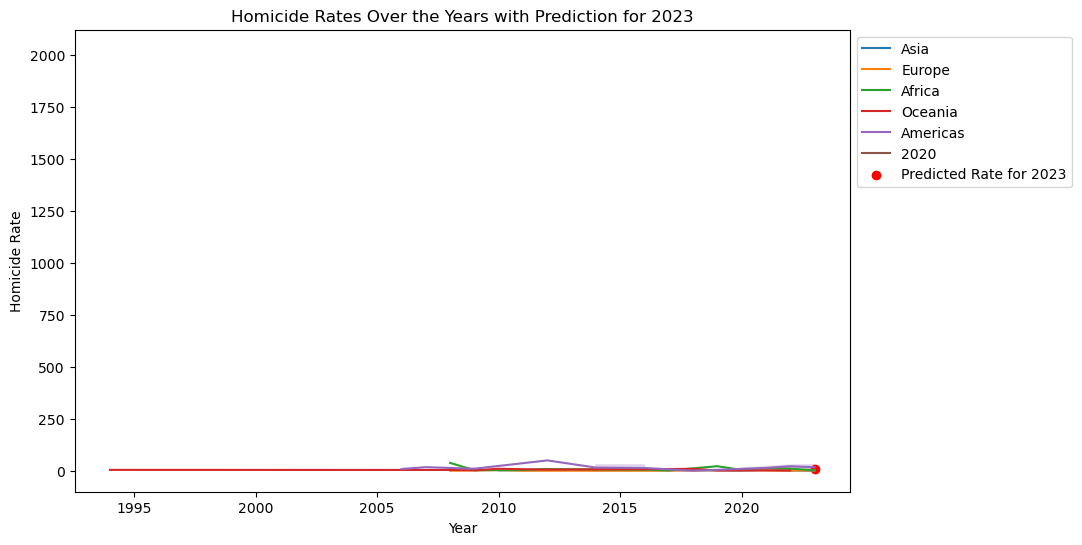

In [46]:
# Extend the dataset to include the prediction year (2023)
homicide_df_extended = homicide_df.copy()
homicide_df_extended.loc[len(homicide_df_extended)] = [2023, 2022, 2021, 2020, 2018, 2017, 2016]

# Predicting for the next year (2023)
prediction_homicide = model_homicide.predict([[2023, homicide_df['Count'].mean()]])

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rate', hue='Region', data=homicide_df_extended)
plt.scatter(2023, prediction_homicide[0], color='red', marker='o', label='Predicted Rate for 2023')
plt.title('Homicide Rates Over the Years with Prediction for 2023')
plt.xlabel('Year')
plt.ylabel('Homicide Rate')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Predictive Model for USA Crime Distribution

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data1 = pd.read_csv('processed_violent_crime_data.csv') 

data1

,Year,Value
0,-O4K4ES3_goJFv8qOKv3,"{'2018': 383.4, '2019': 380.8, '2020': 398.5, ..."
1,-O4K4EYXNtleOaH8Lbvr,"{'2018': 997.1, '2019': 1045.2, '2020': 999.8,..."
2,-O4K4EpJVIFcBFx4sKeU,"{'2018': 842.8, '2019': 824.0, '2020': 778.3, ..."
3,-O4K4EvlglELWzIZz9VU,"{'2018': 891.7, '2019': 865.0, '2020': 837.8, ..."
4,-O4K4F1FYXoWkCdWtST7,"{'2018': 561.6, '2019': 580.8, '2020': 671.9, ..."
5,-O4K4F7g192c7XnASEYU,"{'2018': 543.3, '2019': 559.7, '2020': 639.4, ..."
6,-O4K4FE3gOI-yuJY3CZV,"{'2018': 630.4, '2019': 598.9, '2020': 672.7, ..."
7,-O4K4FKNqkaCa8NrYxvh,"{'2018': 447.5, '2019': 442.1, '2020': 442.0, ..."
8,-O4K4FQrjViSuiIN9AWh,"{'2018': 401.5, '2019': 384.6, '2020': 423.1, ..."
9,-O4K4FXICsJXPTMBUrYu,"{'2018': 500.8, '2019': 510.1, '2020': 530.7, ..."


In [49]:
df=data1.copy()

def safe_literal_eval(value):
    if pd.isna(value):
        return {}
    return ast.literal_eval(value)

df['Value'] = df['Value'].apply(safe_literal_eval)

# Create new columns for each year and the location
years = ['2018', '2019', '2020', '2021', '2022']
df_location = df['Value'].apply(lambda x: pd.Series(x))  # Expand the dictionaries into separate columns

# Combine with original DataFrame
df_final = pd.concat([df_location[['Location']], df_location[years]], axis=1)

# Print the resulting DataFrame
print(df_final)

                Location   2018    2019   2020   2021   2022
0          United States  383.4   380.8  398.5  387.0  380.7
1   District of Columbia  997.1  1045.2  999.8  951.3  812.3
2             New Mexico  842.8   824.0  778.3  820.8  780.5
3                 Alaska  891.7   865.0  837.8  759.1  758.9
4               Arkansas  561.6   580.8  671.9  702.4  645.3
5              Louisiana  543.3   559.7  639.4  662.7  628.6
6              Tennessee  630.4   598.9  672.7  671.8  621.6
7             California  447.5   442.1  442.0  481.2  499.5
8               Colorado  401.5   384.6  423.1  480.4  492.5
9         South Carolina  500.8   510.1  530.7  513.8  491.3
10              Missouri  501.4   499.6  542.7  524.3  488.0
11              Michigan  452.5   438.6  478.0  491.1  461.0
12                Nevada  552.1   496.1  460.3  432.0  454.0
13                 Texas  412.9   421.8  446.5  453.0  431.9
14               Arizona  475.7   447.1  484.8  425.6  431.5
15              New York

In [50]:
df_final.dropna(inplace=True)

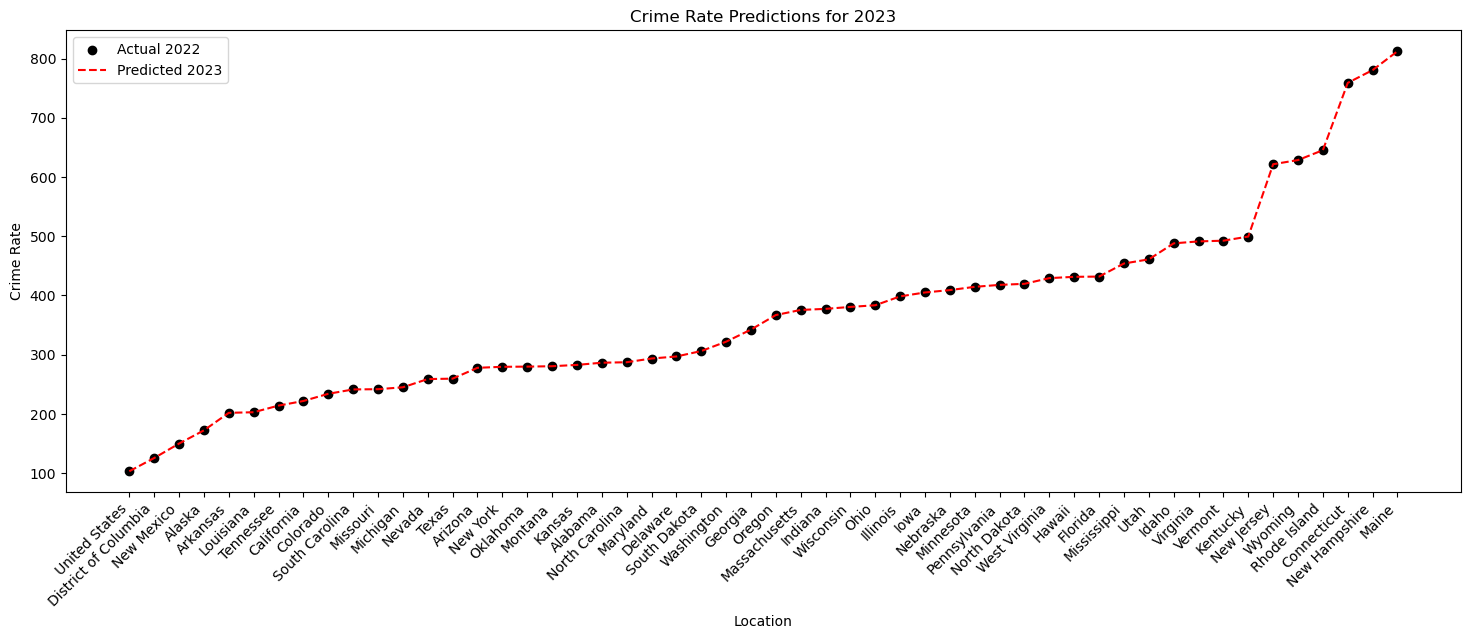

In [51]:
df = pd.DataFrame(df_final)
df['2023'] = None
# Split the data into features and target variable
# Define features (X) and target variable (y) for the model
X = df.drop(columns=['Location', '2023'])  # Exclude 'Location' and '2023' from features
y = df['2022']  # Target is the 2022 data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for 2023
predictions_2023 = model.predict(X)  # Predict for all locations

# Add predictions to the DataFrame
df['2023'] = predictions_2023

# Sort the data by actual 2022 crime rates
sorted_indices = y.argsort()
actual_sorted = y.iloc[sorted_indices]
predictions_sorted = df['2023'].iloc[sorted_indices]

# Visualize the predictions
plt.figure(figsize=(18, 6))
plt.scatter(df['Location'], actual_sorted, color='black', label='Actual 2022')
plt.plot(df['Location'], predictions_sorted, color='red', label='Predicted 2023', linestyle='dashed')
plt.title('Crime Rate Predictions for 2023')
plt.xlabel('Location')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

## Summary

**This project involved an in-depth analysis of intentional homicide and violent crime rates using data from various sources, including Wikipedia and the Firebase Realtime Database. The main objective was to identify patterns, trends, and geographic distributions of crime over time.**

## Homicide Data Analysis
**Data Gathering: We collected intentional homicide rates from Wikipedia and stored them in a Firebase Realtime Database for easy access.**

**Visualization: Utilizing the Dash framework and Plotly Express, we created an interactive dashboard with visualizations such as bar charts, scatter plots, pie charts, maps, histograms, and animated bar charts, allowing for a detailed examination of homicide rates by region, subregion, and year.**

**Key Insights: The analysis revealed significant variations in homicide rates across different regions, with the animated bar chart illustrating trends over time.**

## Violent Crime Data Analysis
**Data Gathering: Violent crime rate data for U.S. states and territories was extracted from Wikipedia, followed by cleaning and processing before being stored in Firebase.**

**Dashboard Features: The dashboard was enhanced to include a line chart that displayed violent crime rates over the years for selected U.S. locations.**

## Machine Learning Predictions
**Modeling Approaches: We implemented linear regression models to forecast future crime rates based on historical data, including predictions for homicide rates in 2023 and violent crime rates in various U.S. areas.**

**Prediction Visualization: The projected rates were compared with actual data through visualizations, making it easier to identify potential trends.**

## Team Collaboration
**Personal Touch: An "About Us" section was added to introduce team members with their student id.**

## Conclusions and Future Directions
**Outcome: The project showcased trends in intentional homicide and violent crime rates, providing valuable insights for policymakers, researchers, and the public.**

**Future Enhancements: Future work could involve more sophisticated machine learning models, the inclusion of socio-economic factors, and a broader geographical analysis.**

**In summary, this project offers an extensive exploration of crime rates, presenting an interactive platform for users to analyze the dynamics of intentional homicide and violent crime.**

### YouTube Presentation Link
[Watch the Group Presentation on YouTube](https://www.youtube.com/watch?v=M58BvENrL10)


### GoogleDrive Presentation Link
[View the Group Presentation on GDrive](https://drive.google.com/file/d/1UbQjeJAH9WPGeDhIeMEbEwA9m14K7-sJ/view?usp=sharing)
